# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
data = {
    'Age Group': ['0-10 years', '11-20 years', '21-30 years', '31-40 years', '41-50 years',
                  '51-60 years', '61-70 years', '71-80 years', '81+ years'],
    'Generic Medicines Sold': [150000, 180000, 250000, 220000, 200000, 270000, 300000, 180000, 100000],
    'Branded Medicines Sold': [200000, 160000, 300000, 280000, 250000, 230000, 250000, 220000, 120000]
}

df = pd.DataFrame(data)
df['Total Medicines Sold'] = df['Generic Medicines Sold'] + df['Branded Medicines Sold']


In [3]:
# Summary statistics
print(df.describe())


       Generic Medicines Sold  Branded Medicines Sold  Total Medicines Sold
count                9.000000                9.000000              9.000000
mean            205555.555556           223333.333333         428888.888889
std              62070.748165            56789.083458         110955.446514
min             100000.000000           120000.000000         220000.000000
25%             180000.000000           200000.000000         350000.000000
50%             200000.000000           230000.000000         450000.000000
75%             250000.000000           250000.000000         500000.000000
max             300000.000000           300000.000000         550000.000000


# Visualisation

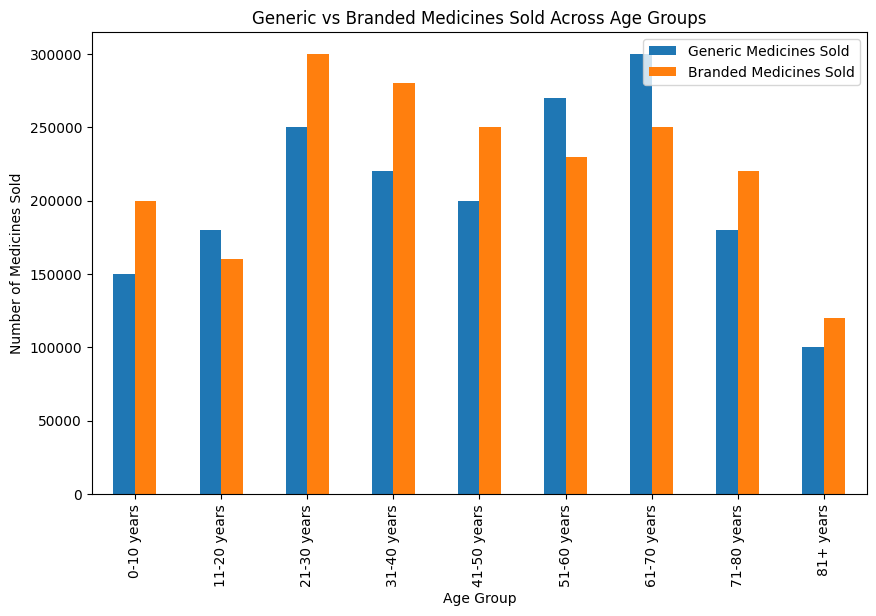

In [4]:
df.plot(kind='bar', x='Age Group', y=['Generic Medicines Sold', 'Branded Medicines Sold'],
        stacked=False, figsize=(10, 6))
plt.title('Generic vs Branded Medicines Sold Across Age Groups')
plt.ylabel('Number of Medicines Sold')
plt.show()


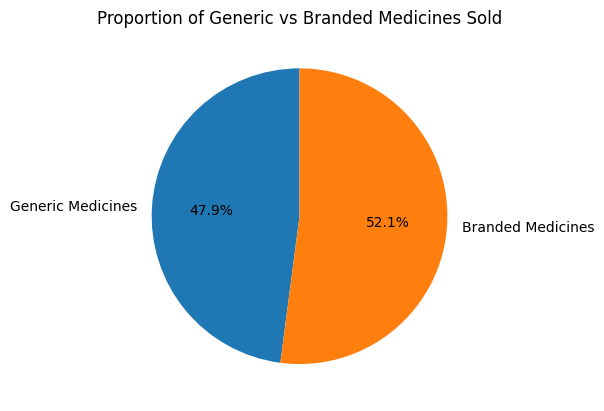

In [5]:
total_generic = df['Generic Medicines Sold'].sum()
total_branded = df['Branded Medicines Sold'].sum()

plt.pie([total_generic, total_branded], labels=['Generic Medicines', 'Branded Medicines'],
        autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Generic vs Branded Medicines Sold')
plt.show()


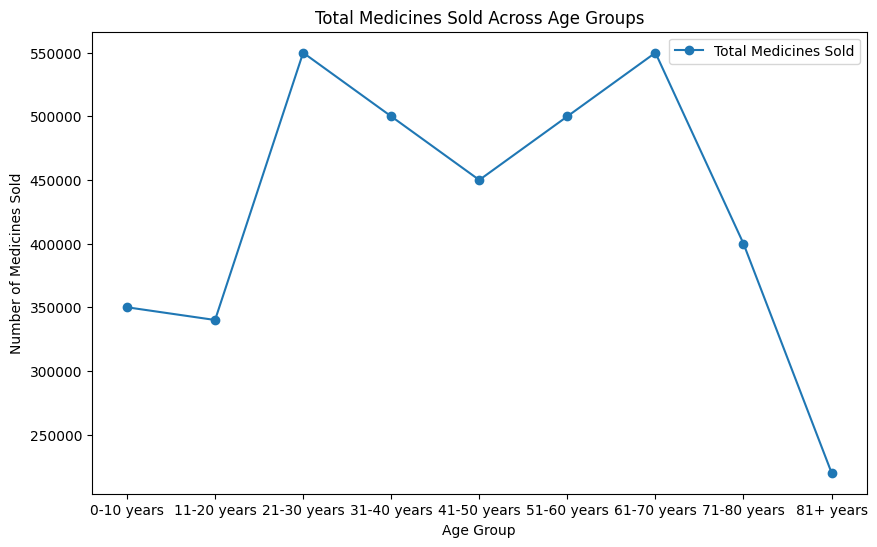

In [6]:
df.plot(kind='line', x='Age Group', y='Total Medicines Sold', marker='o', figsize=(10, 6))
plt.title('Total Medicines Sold Across Age Groups')
plt.ylabel('Number of Medicines Sold')
plt.show()


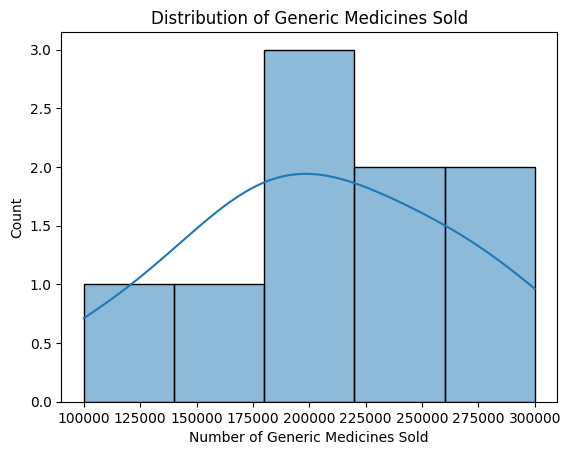

In [7]:
sns.histplot(df['Generic Medicines Sold'], kde=True)
plt.title('Distribution of Generic Medicines Sold')
plt.xlabel('Number of Generic Medicines Sold')
plt.show()


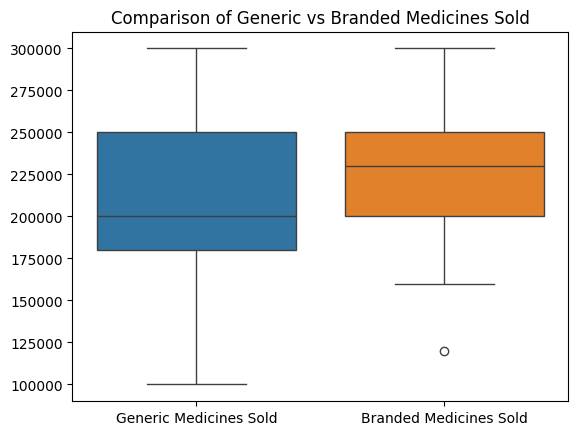

In [8]:
sns.boxplot(data=df[['Generic Medicines Sold', 'Branded Medicines Sold']])
plt.title('Comparison of Generic vs Branded Medicines Sold')
plt.show()


In [9]:
# Find the age group with the highest and lowest total medicine sales
max_sales_group = df.loc[df['Total Medicines Sold'].idxmax()]
min_sales_group = df.loc[df['Total Medicines Sold'].idxmin()]

print("Age Group with Highest Sales:\n", max_sales_group)
print("Age Group with Lowest Sales:\n", min_sales_group)

Age Group with Highest Sales:
 Age Group                 21-30 years
Generic Medicines Sold         250000
Branded Medicines Sold         300000
Total Medicines Sold           550000
Name: 2, dtype: object
Age Group with Lowest Sales:
 Age Group                 81+ years
Generic Medicines Sold       100000
Branded Medicines Sold       120000
Total Medicines Sold         220000
Name: 8, dtype: object


Regression Model


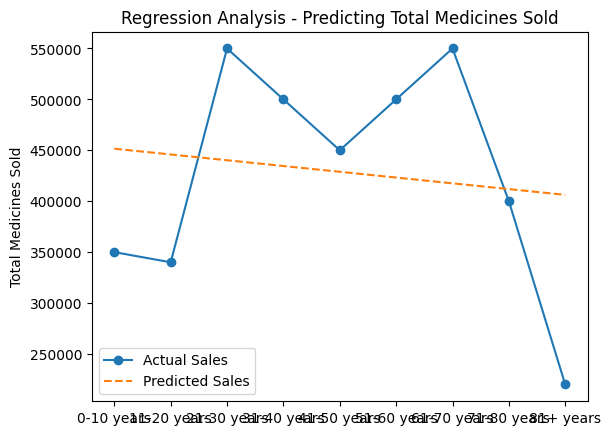

Slope (Coefficient): [-5666.66666667]
Intercept: 451555.55555555556


In [10]:
from sklearn.linear_model import LinearRegression

# Prepare the data for regression
X = np.array(range(len(df))).reshape(-1, 1)  # Age groups as a simple numeric sequence
y = df['Total Medicines Sold']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict total medicines sold
predictions = model.predict(X)

# Plot the regression line
plt.plot(df['Age Group'], y, label='Actual Sales', marker='o')
plt.plot(df['Age Group'], predictions, label='Predicted Sales', linestyle='--')
plt.title('Regression Analysis - Predicting Total Medicines Sold')
plt.ylabel('Total Medicines Sold')
plt.legend()
plt.show()

# Print the model coefficients
print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)
